<a href="https://colab.research.google.com/github/aminishere/colab/blob/main/dga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv("gas.csv")

In [ ]:
df

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
0,0,555,515,377,338,666,451,416,NoGas,0_NoGas
1,1,555,516,377,339,666,451,416,NoGas,1_NoGas
2,2,556,517,376,337,666,451,416,NoGas,2_NoGas
3,3,556,516,376,336,665,451,416,NoGas,3_NoGas
4,4,556,516,376,337,665,451,416,NoGas,4_NoGas
...,...,...,...,...,...,...,...,...,...,...
6395,1595,658,445,455,414,491,321,436,Mixture,1595_Mixture
6396,1596,650,444,451,411,486,317,431,Mixture,1596_Mixture
6397,1597,630,443,446,407,474,312,429,Mixture,1597_Mixture
6398,1598,632,443,444,405,471,309,430,Mixture,1598_Mixture


In [ ]:
predictors = ['MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135']
labels = 'Gas'
df= df.loc[: , predictors+[labels]]
df

,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas
0,555,515,377,338,666,451,416,NoGas
1,555,516,377,339,666,451,416,NoGas
2,556,517,376,337,666,451,416,NoGas
3,556,516,376,336,665,451,416,NoGas
4,556,516,376,337,665,451,416,NoGas
...,...,...,...,...,...,...,...,...
6395,658,445,455,414,491,321,436,Mixture
6396,650,444,451,411,486,317,431,Mixture
6397,630,443,446,407,474,312,429,Mixture
6398,632,443,444,405,471,309,430,Mixture


In [ ]:
int_columns = ['MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135']
for col in int_columns:
  df[col] = df[col].astype('int32')

In [ ]:
df['Gas'].value_counts().index.tolist()

['NoGas', 'Perfume', 'Smoke', 'Mixture']

In [ ]:
X = df.drop('Gas', axis =1)
y = df['Gas']

In [ ]:
X_traival, X_test, y_traival, y_test = train_test_split(X, y, test_size = 0.2 , random_state =42, stratify =y)
X_train, X_val , y_train, y_val = train_test_split(X_traival , y_traival , test_size = 0.25 , random_state= 42, stratify = y_traival )

In [ ]:
import numpy as np

outlier - removal

In [ ]:
def outlier_removal(column: pd.Series):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return column[(column > lower_bound) & (column < upper_bound)]

In [ ]:
for col in predictors:
  X_train[col] = outlier_removal(X_train[col])

In [ ]:
for col in predictors:
  X_train[col] = outlier_removal(X_train[col])
y_train = y_train[X_train.notna().all(axis=1)]
X_train = X_train.dropna(how='any')

data scaling

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
def standard_scaler(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, scaler

In [ ]:
X_train_feng, scaler = standard_scaler(X_train)

In [ ]:
X_test_feng = scaler.transform(X_test)
X_val_feng = scaler.transform(X_val)

data labelling

In [ ]:
def label_encoder(y, target_classes=None):
    encoder = LabelEncoder()

    if target_classes is not None:
        encoder.fit(target_classes)  # fit on predefined class list
    else:
        encoder.fit(y)               # fit on the actual labels in y

    y_label_encoded = encoder.transform(y)
    return y_label_encoded, encoder

In [ ]:
# Fit encoder on training labels
y_train_feng, encoder = label_encoder(y_train.values.ravel())

# Transform val and test labels using the same encoder
y_val_feng = encoder.transform(y_val.values.ravel())
y_test_feng = encoder.transform(y_test.values.ravel())

modelling

In [ ]:
print(X_train_feng.shape)
print(y_train_feng.shape)

(3782, 7)
(3782,)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [ ]:
rf= RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_feng, y_train_feng)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068151,0.008183,0.004459,0.000208,None,1,2,10,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.970938,0.968296,0.951058,0.973545,0.968254,0.966418,0.007925,25
1,0.326265,0.010867,0.012363,0.000273,None,1,2,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.970938,0.970938,0.958995,0.974868,0.969577,0.969063,0.005336,1
2,0.656974,0.038423,0.022937,0.002124,None,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.972259,0.969617,0.960317,0.972222,0.969577,0.968798,0.004402,8
3,3.229838,0.487652,0.106324,0.006927,None,1,2,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.972259,0.970938,0.961640,0.972222,0.968254,0.969063,0.003987,4
4,0.113703,0.026728,0.009464,0.005557,None,1,5,10,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.961691,0.959049,0.957672,0.969577,0.965608,0.962719,0.004368,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.267214,0.009580,0.042685,0.001154,30,4,5,200,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.959049,0.957728,0.956349,0.965608,0.962963,0.960339,0.003437,97
140,0.063864,0.001062,0.004346,0.000032,30,4,10,10,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.961691,0.961691,0.956349,0.964286,0.956349,0.960073,0.003185,118
141,0.312528,0.015570,0.012192,0.000524,30,4,10,50,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.960370,0.957728,0.955026,0.966931,0.961640,0.960339,0.004005,104
142,0.648163,0.049139,0.024473,0.005610,30,4,10,100,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.963012,0.957728,0.953704,0.966931,0.962963,0.960868,0.004625,93


knn


In [ ]:
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [5, 10, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree'],
    'leaf_size': [10, 30, 50]
}
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_feng, y_train_feng)

# Get the best hyperparameters
best_params = grid_search_knn.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}


model rtraining

In [ ]:
clf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
clf.fit(X_train_feng, y_train_feng)


RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search_knn.best_params_)
knn_clf.fit(X_train_feng, y_train_feng)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, weights='distance')

In [ ]:
best_val_score = clf.score(X_val_feng, y_val_feng)
print(f'Best RF model accuracy score on val set: {best_val_score}')

Best RF model accuracy score on val set: 0.9703125


In [ ]:
best_val_score = knn_clf.score(X_val_feng, y_val_feng)
print(f'Best kNN model accuracy score on val set: {best_val_score}')

Best kNN model accuracy score on val set: 0.971875


metric on trained model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
print("k-Fold CV Score for Random Forest:")
cv= StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(clf, X_train_feng, y_train_feng, cv=cv, scoring='accuracy')
print( "Cross validation scores:",cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

k-Fold CV Score for Random Forest:
Cross validation scores: [0.97093791 0.97093791 0.95899471 0.97486772 0.96957672]
Mean cross-validation accuracy: 0.9690629958133261


In [ ]:
print("k-Fold CV Score for kNN:")
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(knn_clf, X_train_feng, y_train_feng, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

k-Fold CV Score for kNN:
Cross-validation scores: [0.97622193 0.97093791 0.96164021 0.96428571 0.97486772]
Mean cross-validation accuracy: 0.9695906984546351


In [ ]:
y_pred_rf = clf.predict(X_test_feng)
print("Accuracy score of the RF model (on test set):", clf.score(X_test_feng, y_test_feng))

Accuracy score of the RF model (on test set): 0.97109375


In [ ]:
target_names = [ 'Mixture','NoGas', 'Perfume', 'Smoke']
print(classification_report(y_test_feng, y_pred_rf, target_names= target_names))

              precision    recall  f1-score   support

     Mixture       1.00      1.00      1.00       320
       NoGas       0.94      0.95      0.94       320
     Perfume       0.95      0.94      0.94       320
       Smoke       1.00      1.00      1.00       320

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



In [ ]:
y_pred_knn = knn_clf.predict(X_test_feng)
print("Accuracy score of the kNN model (on test set):", knn_clf.score(X_test_feng, y_test_feng))
print(classification_report(y_test_feng, y_pred_knn, target_names=target_names))

Accuracy score of the kNN model (on test set): 0.9734375
              precision    recall  f1-score   support

     Mixture       1.00      1.00      1.00       320
       NoGas       0.96      0.93      0.95       320
     Perfume       0.94      0.96      0.95       320
       Smoke       1.00      1.00      1.00       320

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



confusion matrix

In [ ]:
confusion_matrix(y_test_feng, y_pred_knn)

array([[320,   0,   0,   0],
       [  0, 299,  21,   0],
       [  0,  13, 307,   0],
       [  0,   0,   0, 320]])

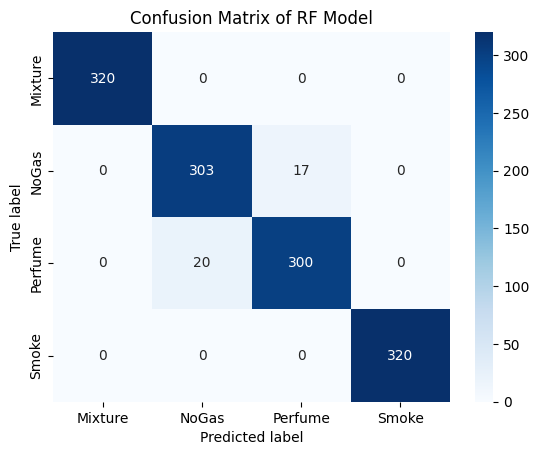

In [ ]:
conf_mat = confusion_matrix(y_test_feng, y_pred_rf)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix of RF Model")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

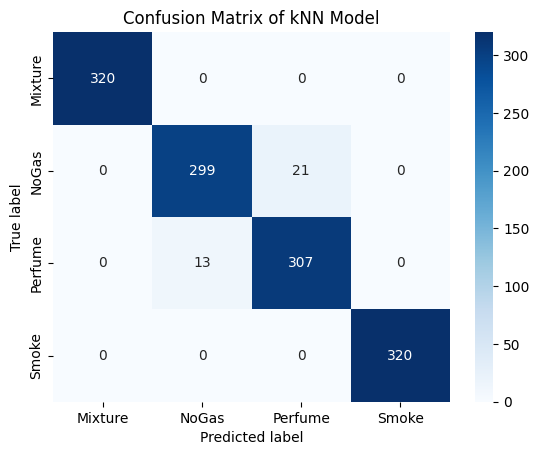

In [ ]:
# confusion matrix for kNN
conf_mat = confusion_matrix(y_test_feng, y_pred_knn)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix of kNN Model")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

roc - auc



In [ ]:
encoder_classes = ['Mixture', 'NoGas', 'Perfume', 'Smoke' ]







y_score = clf.predict_proba(X_test_feng)
n_classes = len(encoder_classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_feng == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

roc_auc

{0: np.float64(1.0),
 1: np.float64(0.9944694010416667),
 2: np.float64(0.993955078125),
 3: np.float64(1.0)}

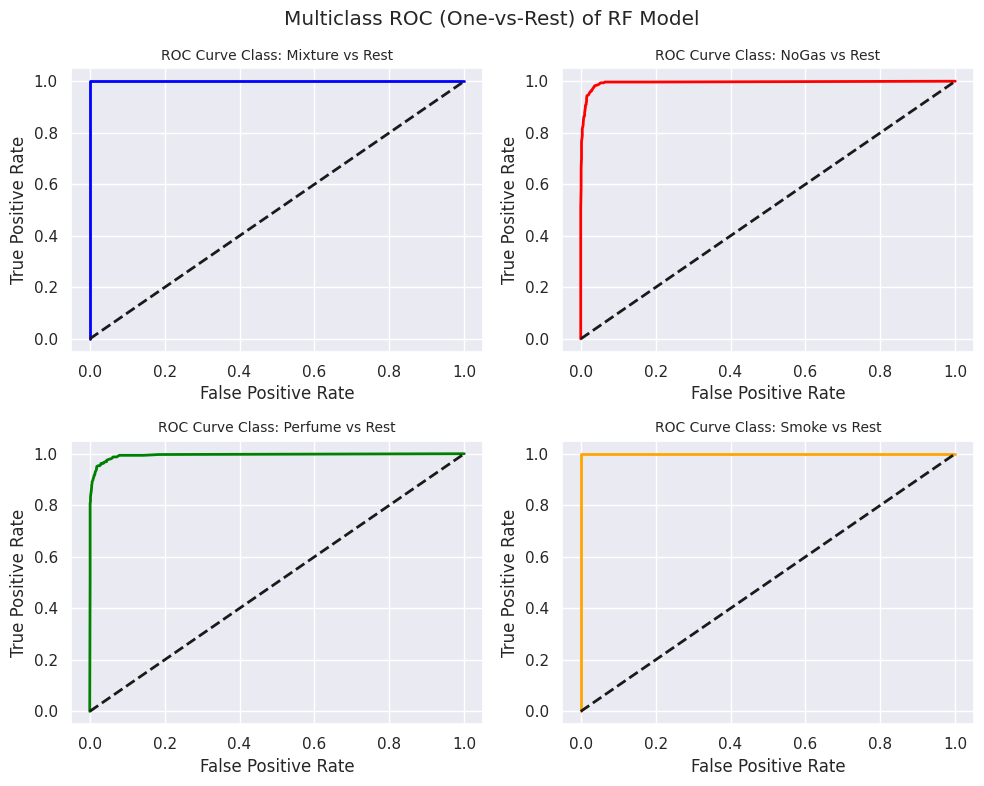

In [ ]:
colors = ['blue', 'red', 'green', 'orange', 'yellow', 'purple', 'cyan', 'magenta']

sns.set_theme()
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Multiclass ROC (One-vs-Rest) of RF Model')
for i, v in enumerate(encoder_classes):
    ax = plt.subplot(2, 2, i+1)
    ax.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f"ROC curve of class {v} (area = {roc_auc[i]:.2f})")
    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_title(f'ROC Curve Class: {v} vs Rest', fontdict={'fontsize': 10})
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

plt.tight_layout()
plt.show()

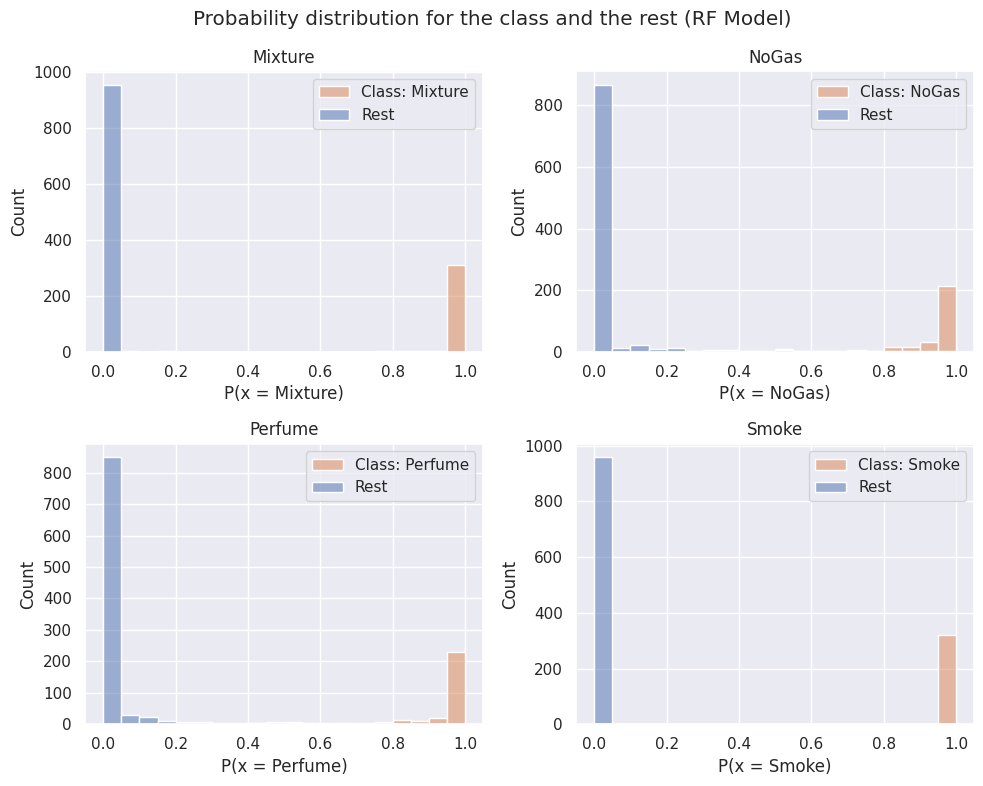

In [ ]:
colors = ['blue', 'red', 'green', 'orange', 'yellow', 'purple', 'cyan', 'magenta']
sns.set_theme()


fig = plt.figure(figsize=(10, 8))
fig.suptitle('Probability distribution for the class and the rest (RF Model)')
bins = [i/20 for i in range(20)] + [1]

for i, v in enumerate(encoder_classes):
    df_aux = pd.DataFrame({'class': [1 if y == i else 0 for y in y_test_feng],
                            'prob': y_score[:, i]
                        })
    ax = plt.subplot(2, 2, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(v)
    ax.legend([f"Class: {v}", "Rest"])
    ax.set_xlabel(f"P(x = {v})")

plt.tight_layout()
plt.show()